## KNN Implemented using sklearn + GridSearch Cross-Validation for Hyperparameter tuning
___

**Dataset**: Wine

In [16]:
from em_el.datasets import load_wine
from em_el.utils import draw_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [17]:
wine = load_wine()

In [18]:
# X = wine_df.drop(['target'], axis = 1).to_numpy()
X = wine.iloc[:, :3].to_numpy()
y = wine['target'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
wine_knn = KNeighborsClassifier(n_neighbors=4)
wine_knn.fit(X_train, y_train)
y_hat = wine_knn.predict(X_test)

Accuracy: 0.8888888888888888
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       1.00      0.93      0.96        14
           2       0.70      0.88      0.78         8

    accuracy                           0.89        36
   macro avg       0.87      0.89      0.88        36
weighted avg       0.90      0.89      0.89        36

Confusion Matrix 
 [[12  0  2]
 [ 0 13  1]
 [ 1  0  7]]


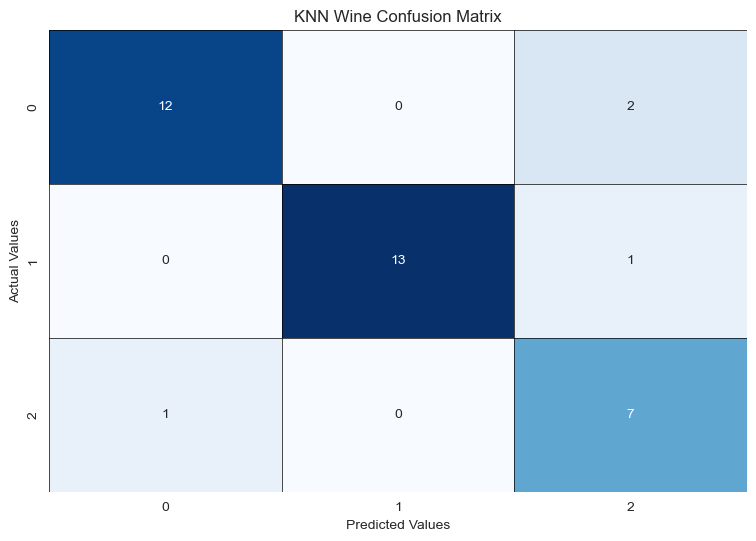

In [20]:
acc = accuracy_score(y_test, y_hat)
print(f"Accuracy: {acc}")

clf_rep = classification_report(y_test, y_hat)
print(f"Classification Report:\n {clf_rep}")

conf_matrix = confusion_matrix(y_test, y_hat)
print(f"Confusion Matrix \n {conf_matrix}")

draw_confusion_matrix(conf_matrix, "KNN Wine Confusion Matrix")

In [11]:
# GridSearchCV to determine optimal K

k_range = np.array(range(3, 20))

param_grid = {'n_neighbors': k_range,}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f"Best k: {best_k}")

Best k: 4


#### Sparseness

The implementation of KNN on the wine dataset illustrates an important consideration: the sparseness of higher-dimensional data. That is, there is a lot of empty space as we increase the dimensionality of the feature array, which negatively impacts the performance of KNN. Even though we give the algorithm more data when supplying the entire feature array, the algorithm's classification performance improves considerably by restricting to the first three.

The repository section on Dimensionality reduction will revisit this example.